In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# NSL_8

### EX08_1

The variational Monte Carlo code has been implemented exploiting and improving the previous code written for the exercise 5 (NSL_5). The code needs two functions to be defined:
- the pdf function to sample
- the integrand function

In this case the first function corresponds to the square modulus of the trial wavefunction. The normalization is not needed by the Metropolis which works only with the rate of the wavefunction evaluated at two different points.  This is the analytical expression for $|\Psi_T^{\sigma,\mu}(x)|^2$:

$$ |\Psi_T^{\sigma,\mu}(x)|^2 =  (e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}})^2 $$

The integrand function is $\frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}$. Here's the analytical expression:

$$ \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)} = -\frac{1}{2\sigma^2}\frac{{(\frac{(x-\mu)^2}{\sigma^2}-1)}e^{-\frac{(x-\mu)^2}{2\sigma^2}}+{(\frac{(x+\mu)^2}{\sigma^2}-1)}e^{-\frac{(x+\mu)^2}{2\sigma^2}}}{e^{-\frac{(x-\mu)^2}{2\sigma^2}}+e^{-\frac{(x+\mu)^2}{2\sigma^2}}} + x^4 - \frac{5}{2}x^2$$

It is now possible to calculate the energy of a wavefunction fixed $\mu$ and $\sigma$.

### EX08_2

minimum energy = -0.445086 +- 0.00074061
minimum mu = 0.8
minimum sigma = 0.615
minimum step = 5.0


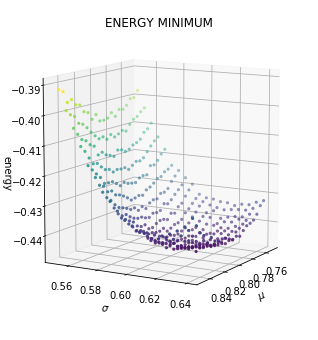

In [4]:
fig = plt.figure(figsize=(12,6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
mu, sigma, step, en, en_err = np.loadtxt('es08_2_files/params.out', usecols=(0,1,2,3,4), unpack = True)
ax.scatter(mu, sigma, en, c=en, marker='.')
ax.set_xlabel(r'$\mu$')
ax.set_ylabel(r'$\sigma$')
ax.set_zlabel(r'energy')
ax.view_init(10, 30)
ax.set_title('ENERGY MINIMUM')
min_en = min(en)
ind = np.argmin(en)
min_mu = mu[ind]
min_sigma = sigma[ind]
min_step = step[ind]
print('minimum energy = '+str(min_en)+' +- '+str(en_err[ind]))
print('minimum mu =', min_mu)
print('minimum sigma =', min_sigma)
print('minimum step =', min_step)

To find the minimum of the energy a simple script has been exploited. Basically, the energy of the system has been calculated for a grid of values in the space of the parameters with $\mu$ ranging from $0.75$ to $0.85$ in steps of $0.005$ and $\sigma$ ranging from $0.55$ to $0.64$ in steps of $0.005$. The ranges were established after some manual testing. The step of the Metropolis algorithm has been adapted every time to maintain an empirical $50\%$ acceptance rate. Each energy has been calculated using a simulation with $10^6$ steps. The minimum of the energy is assumed to be the minimum value calculated and the relative $\mu$ and $\sigma$ are taken to build the ground state of the hamiltonian.

The graph above represents the energy in the parameters' space. It's clear that there is a minimum from the characteristic dipped form of the function. Here's the results:
- Minimum energy = -0.445086 +- 0.00074061
- $\mu$ = 0.8
- $\sigma$ = 0.615

The Metropolis step chosen for this particular computation is 5.

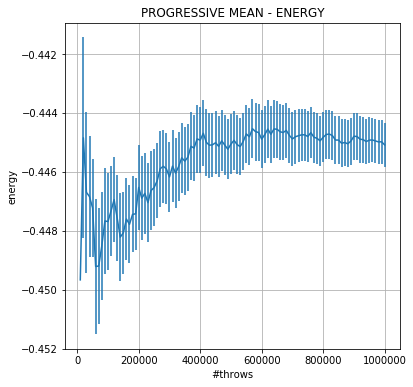

In [12]:
throws, en, err_en = np.loadtxt("es08_2_files/es08_2.txt", skiprows=2, usecols=(0,2,3), unpack='true')
fig, ax = plt.subplots(1, 1,figsize=(6, 6))

ax.errorbar(throws, en, err_en)
ax.set_title("PROGRESSIVE MEAN - ENERGY")
ax.set_xlabel(f"#throws")
ax.set_ylabel("energy")
ax.grid(True)

Here's the progressive mean for the energy calculated with the blocking method ( $N=100$ blocks with a total of $M=10^6$ throws ). It is clear that the value of the energy calculated is stable after $10^6$ throws. Unfortunately, the statistical uncertainty is not compatible with the value computed in the instructions.

In [13]:
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

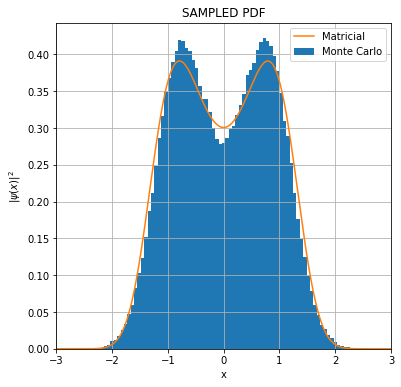

In [14]:
fig, ax = plt.subplots(1, 1,figsize=(6, 6))
bins = np.linspace(-3,3,100)
xs = np.linspace(-5,5,1000)

x = np.loadtxt("es08_2_files/modq_psi.txt", usecols=(0), unpack='true')

#scale = 0.03
#ax.plot(xs, scale*V, color="Black", label="Potential")
ax.hist(x, bins, density = True, label = 'Monte Carlo')
ax.plot(xs, (psi[0])**2, label='Matricial')
ax.set_title(f"SAMPLED PDF")
ax.set_xlabel(f"x")
ax.set_xlim(-3,3)
ax.set_ylabel(r"$|\psi (x)|^2$")
ax.legend()
ax.grid()
#ax.xaxis.label.set_size(14)
#ax.yaxis.label.set_size(14)
#ax.set_xlim(0.,1.)

In conclusion, here's a comparison between the wavefunction computed in the instructions and with the Metropolis algorithm. In this case, the wavefunction is obtained by filling an histogram with a fraction (~$\frac{1}{10}$) of the positions assumed by the Metropolis. The two distributions are slightly different in th central region but, overall, they resemble the same distribution.